In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
os.chdir('..')
os.chdir('..')
cwd = os.getcwd()
print(cwd)

D:\Programming\Subreddit-Stock-Prediction


--------------daytrading_features_labels.csv-------------
(160, 12)


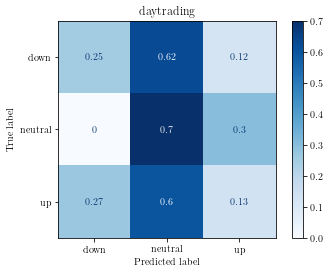

--------------dividends_features_labels.csv-------------
(78, 12)


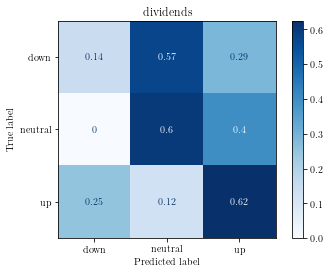

--------------investing_features_labels.csv-------------
(1690, 12)


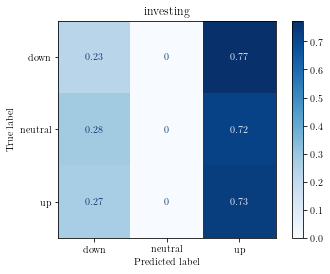

--------------options_features_labels.csv-------------
(992, 12)


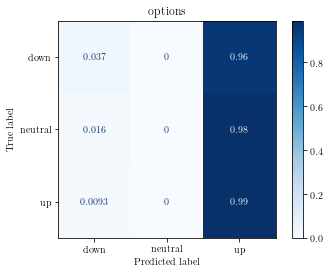

--------------securityanalysis_features_labels.csv-------------
(52, 12)


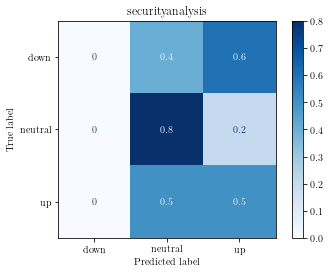

--------------stockmarket_features_labels.csv-------------
(564, 12)


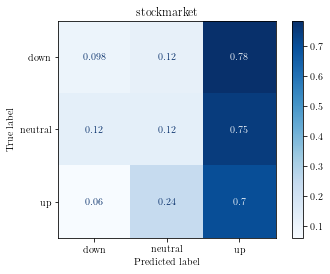

--------------stocks_features_labels.csv-------------
(2584, 12)


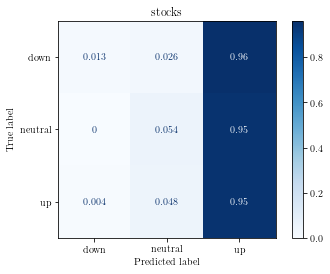

In [7]:
for filename in os.listdir("data"):
    if (not filename.endswith("_features_labels.csv")) or 'economy' in filename:
        continue
    print(f"--------------{filename}-------------")
    data = pd.read_csv(f"data/{filename}")
    features = data.to_numpy()[:,:-2]
    labels = data.to_numpy()[:,-2] + 1
    num_features = features.shape[1]

    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
    
    print(X_train.shape)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    clf = LogisticRegression(random_state=0, solver='saga', max_iter=1000).fit(scaler.transform(X_train), y_train)
    np.set_printoptions(precision=2)
    
    class_names = ['down', 'neutral', 'up']

    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp.ax_.set_title(filename[:-len("_features_labels.csv")])
    plt.savefig(f'Confusion{filename[:-len("_features_labels.csv")]}.pgf')
    plt.show()
    
#     print("Class Percentages", (y_test == 0).sum() / y_test.shape[0], (y_test == 1).sum() / y_test.shape[0], (y_test == 2).sum() / y_test.shape[0])
# #     print(clf.predict_proba(X_test))
#     print(clf.score(scaler.transform(X_test), y_test))
#     preds = clf.predict(scaler.transform(X_test))
#     print("Class Predictions", (preds == 0).sum() / preds.shape[0], (preds == 1).sum() / preds.shape[0], (preds == 2).sum() / preds.shape[0])
    

In [32]:
import numpy as np
np.exp(clf.coef_)
# np.concatenate((s_sentiments, c_sentiments, np.array([hist_p]), np.array([label]), np.array([percent])), axis=0)

array([[1.02519214, 1.00159577, 0.99392895, 1.16401538, 0.93460822,
        1.01009408, 1.23326479, 0.92593677, 0.98173248, 0.95094676,
        1.05241545, 0.98236095],
       [1.00106437, 1.00759318, 0.96574721, 0.79744892, 1.09944146,
        0.94385911, 0.98293547, 1.0020657 , 0.9827855 , 1.06677072,
        0.90722807, 1.0655658 ],
       [0.97438979, 0.99088282, 1.04179243, 1.07730434, 0.97319146,
        1.04889256, 0.82493296, 1.07776101, 1.03644938, 0.98576345,
        1.04736078, 0.95531949]])